In [ ]:
## This scripts create a simple vertical cross-section plot from a netcdf file created by m2section HYCOM-CICE-ECOSMO

In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pydap
# from pydap.client import open_url

In [2]:
!ls

ArabainSea_section_plot.jnl	    sections_ArabianSea.jpg.~16~
oxygen_section_plot_40-80_0.jpg     sections_ArabianSea.jpg.~17~
resolution_plot.ipynb		    sections_ArabianSea.jpg.~18~
resolution_plot_stereographic.py    sections_ArabianSea.jpg.~19~
salin_section_plot_40-80_0.jpg	    sections_ArabianSea.jpg.~2~
section001.dat			    sections_ArabianSea.jpg.~20~
section001.nc			    sections_ArabianSea.jpg.~21~
section_clean.csv		    sections_ArabianSea.jpg.~22~
section_clean.dat		    sections_ArabianSea.jpg.~23~
section_location_test.png	    sections_ArabianSea.jpg.~24~
section_plot.jnl		    sections_ArabianSea.jpg.~3~
sectionplot_m2section_netcdf.ipynb  sections_ArabianSea.jpg.~4~
section_plot_stereographic.py	    sections_ArabianSea.jpg.~5~
sections_ArabianSea.jpg		    sections_ArabianSea.jpg.~6~
sections_ArabianSea.jpg.~1~	    sections_ArabianSea.jpg.~7~
sections_ArabianSea.jpg.~10~	    sections_ArabianSea.jpg.~8~
sections_ArabianSea.jpg.~11~	    sections_ArabianSea.jpg.~9~
sections_Arab

In [18]:
import numpy as np

# File_data = np.loadtxt("section_clean.dat", dtype="int")#, skiprows=1, usecols=(1,2,3,4,5,6))#, dtype=int)
# print(File_data)

# data = np.genfromtxt('section001.dat')
# data = np.genfromtxt('section_clean.csv',
# #                      skip_header=1,
# #                      skip_footer=0,
# #                      names=True,
# #                      dtype="float32",
#                      delimiter=' ')
# print(data)

# df = pd.read_csv('section_clean.csv', names=['A','B','C','D','E','F','G','H'])#, index_col=0)#, index_col=False)
# df

df = pd.read_csv('section001.dat', sep="\s+", skiprows=1, names=['A','B','C','D','E','F','G','H'])
df

,A,B,C,D,E,F,G,H
0,73,399,40.137997,0.014197,15425.521,0.0,0.0,arabiansea
1,74,399,40.316750,-0.113731,37422.475,0.0,0.0,arabiansea
2,74,400,40.444210,0.065297,49924.697,0.0,0.0,arabiansea
3,75,400,40.623508,-0.061692,69669.513,0.0,0.0,arabiansea
4,75,401,40.750027,0.117874,84422.776,0.0,0.0,arabiansea
...,...,...,...,...,...,...,...,...
217,236,453,79.011345,0.048739,4337867.000,0.0,0.0,arabiansea
218,237,453,79.236015,0.045686,4362848.900,0.0,0.0,arabiansea
219,238,453,79.460701,0.043415,4387832.500,0.0,0.0,arabiansea
220,239,453,79.685402,0.041927,4412818.000,0.0,0.0,arabiansea


In [41]:
# fig = plt.figure()
# plt.pcolor(df[:3],df[:1],np.mean(df[:5]))
# plt.colorbar()

In [25]:
# print(df['A'])
df[df.columns[0]]

0       73
1       74
2       74
3       75
4       75
      ... 
217    236
218    237
219    238
220    239
221    240
Name: A, Length: 222, dtype: int64

In [9]:
year1=1992
year2=1992

for year in range(year1, year2+1):
    print("Year: %d" % (year))
    # Open and read the NetCFD file
    #ncfile='Data/FR1_Sec_' + str(year) + '.nc';
    ncfile='section001.nc';
    fh =  Dataset(ncfile, mode='r')
    lon = fh.variables['lon'][:]
    lat = fh.variables['lat'][:]
    li = fh.variables['intf_lower'][:] # layer interphases for plotting
    temp = fh.variables['temp'][:]
    salin = fh.variables['salin'][:]
    oxy = fh.variables['ECO_oxy'][:]
    
    if (year==year1):
        temp_mean = np.mean(temp,0)
        salin_mean = np.mean(salin,0)
        oxy_mean = np.mean(oxy,0)
        temp2salin_mean = temp_mean/salin_mean
        li_mean = np.mean(li,0) 
    else:
        temp_mean = temp_mean + np.mean(salin,0)
        salin_mean = salin_mean + np.mean(salin,0) 
        oxy_mean = oxy_mean + np.mean(oxy,0)
        temp2salin_mean = temp2salin_mean + temp_mean/salin_mean
        li_mean = li_mean + np.mean(li,0)
    
    fh.close()
    
temp_mean=temp_mean/(year2-year1+1)
salin_mean=salin_mean/(year2-year1+1)
oxy_mean=oxy_mean/(year2-year1+1)
temp2salin_mean=temp2salin_mean/(year2-year1+1)

Year: 1992


/tmp/ipykernel_84096/3650852596.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lon,-li_mean,temp_mean)


/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/transport_plots


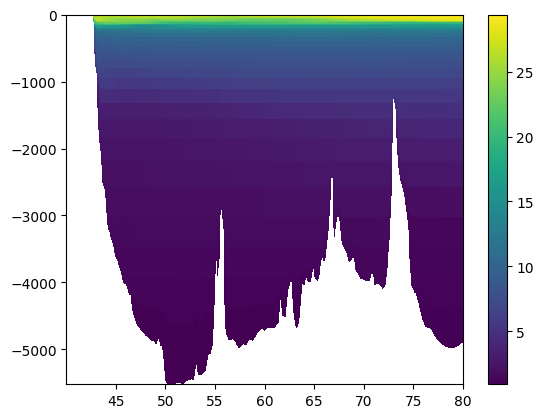

In [10]:
fig = plt.figure()
plt.pcolor(lon,-li_mean,temp_mean)
plt.colorbar()

plt.savefig('section_plot_temp_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd

/tmp/ipykernel_84096/955478989.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lon,-li_mean,salin_mean)


/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/transport_plots


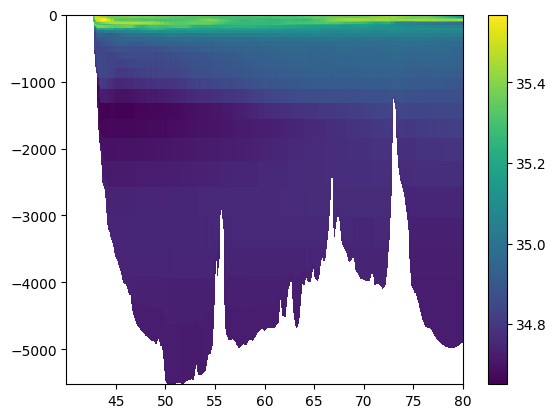

In [11]:
fig = plt.figure()
plt.pcolor(lon,-li_mean,salin_mean)
plt.colorbar()

plt.savefig('section_plot_salin_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd

/tmp/ipykernel_84096/162225207.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(lon,-li_mean,oxy_mean)


/media/akashs/FA22E72622E6E69B/DATA1_disk/1_NANSEN/2_MODELLING/HYCOM_ECOSMO/transport_plots


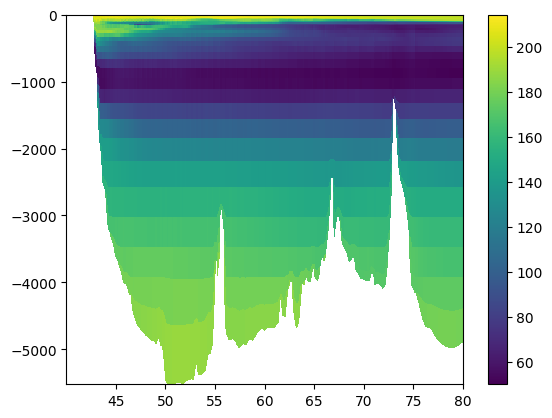

In [13]:
fig = plt.figure()
plt.pcolor(lon,-li_mean,oxy_mean)
plt.colorbar()

plt.savefig('section_plot_oxy_40-80_0.jpg',bbox_inches='tight',dpi=300)
!pwd